In [1]:
### SHALLOW LEARNING ###
from helper_VybhavM import *

## EXTRACTING X AND Y MATRICES. READ HELPER FOR FUNCTION INFO ##
dh = data_handle()
# EXTRACTING 50 SAMPLES OF CLASSES SPECIFIED IN INCLUDE FROM ALL IMGS
# X, y = dh.featurize(n=500, h=False,e=True, include = (2,5,6,7,8,9))


Labels: {'Cardiomegaly': 0, 'Emphysema': 1, 'Effusion': 2, 'No Finding': 3, 'Hernia': 4, 'Infiltration': 5, 'Mass': 6, 'Nodule': 7, 'Atelectasis': 8, 'Pneumothorax': 9, 'Pleural_Thickening': 10, 'Pneumonia': 11, 'Fibrosis': 12, 'Edema': 13, 'Consolidation': 14}

Classes: {'Cardiomegaly': 2776, 'Emphysema': 2516, 'Effusion': 13317, 'No Finding': 60361, 'Hernia': 227, 'Infiltration': 19894, 'Mass': 5782, 'Nodule': 6331, 'Atelectasis': 11559, 'Pneumothorax': 5302, 'Pleural_Thickening': 3385, 'Pneumonia': 1431, 'Fibrosis': 1686, 'Edema': 2303, 'Consolidation': 4667}



<Figure size 640x480 with 1 Axes>

[NbConvertApp] Converting notebook helper_VybhavM.ipynb to script
[NbConvertApp] Writing 13763 bytes to helper_VybhavM.py


In [35]:
X, y = dh.featurize(n=2000,crop = 1024, h=False,e=False,blob = True, tryitall = False, include = (3,5))
# X, y = dh.featurize(n=500, h=False,e=True, include = (2,11))

In [36]:

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

# ONE HOT ENCODING FOR 15 CLASSES, E.G. 0 = [1 0 0 0 .... 0]
range_ = np.array(list(set(y)))
out = lb.fit(range_)
y_binary = out.transform(y.astype(int))
# np.save('X',X)
# np.save('y',y)
# np.save('y_bin', y_binary)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalify = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = scalify.fit_transform(X_train)
X_test = scalify.fit_transform(X_test)


X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_binary, test_size=0.20, random_state=42)
X_train_b = scalify.fit_transform(X_train_b)
X_test_b = scalify.fit_transform(X_test_b)

(3976, 65536) (3976,)


In [37]:
# example
# X_ex = X_test[0,:]
# X_ex = X_ex.reshape((256, 256))
# plt.imshow(X_ex, 'gray')
# plt.show()

# # SVC ONE VS. REST (I THINK THIS CREATES A MODEL FOR EACH CLASS)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train.astype(int))

In [38]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

print("SVC: One vs. Rest \n")
SVC_score = clf.score(X_train, y_train)
print("Training Accuracy: {}%".format(SVC_score*100))
SVC_score_test = clf.score(X_test, y_test)
print("Testing Accuracy: {}%".format(SVC_score_test*100))



SVC: One vs. Rest 

Training Accuracy: 80.50314465408806%
Testing Accuracy: 66.70854271356784%


In [39]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state = 42).fit(X_train_b, y_train_b)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [40]:
print("Random Forest \n")
rd_score = clf_rf.score(X_train_b, y_train_b)
print("Training Accuracy: {}%".format(rd_score*100))
rd_score_test = clf_rf.score(X_test_b, y_test_b)
print("Testing Accuracy: {}%".format(rd_score_test*100))


Random Forest 

Training Accuracy: 100.0%
Testing Accuracy: 67.96482412060301%


In [5]:
# import sklearn
# from sklearn.model_selection import learning_curve
# a = learning_curve(clf,X_train_b,y_train_b )

In [6]:
# print(a)

Automatically created module for IPython interactive environment


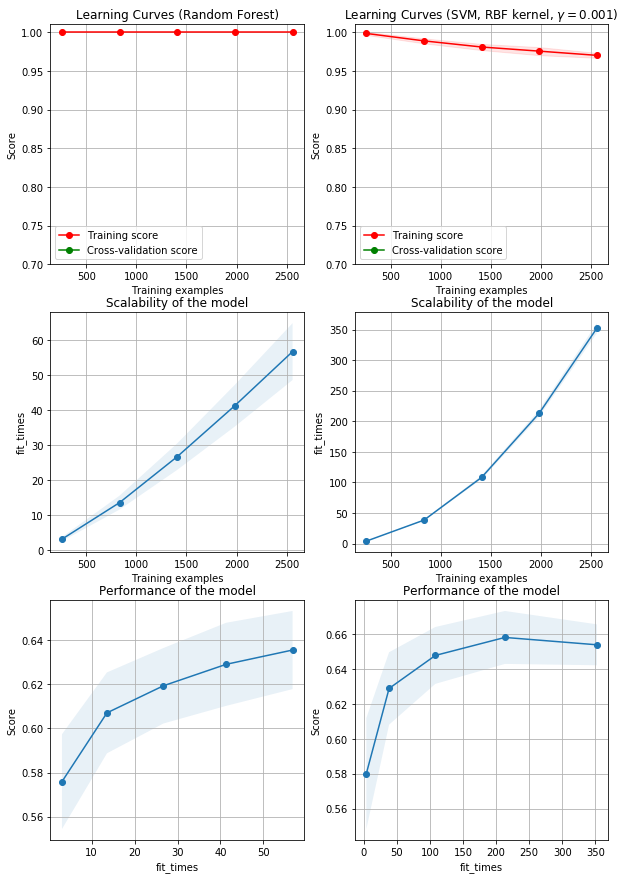

In [7]:
print(__doc__)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# X, y = load_digits(return_X_y=True)
X = X_train_b
y = y_train_b

title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(random_state = 42)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = OneVsRestClassifier(SVC())#gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [24]:
# average_precision = average_precision_score(y_test, clf.predict(X_test_b))

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# disp = plot_precision_recall_curve(classifier, X_test_b, y_test_b)
# disp.ax_.set_title('2-class Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))

# prec,rec,fscore,support = precision_recall_fscore_support(y_test_b, clf.predict(X_test_b) )
# print('Precision: {0:0.2f}'.format(
#       prec))
# print('Recall: {0:0.2f}'.format(
#       rec))
y_score = clf.decision_function(X_test_b)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

ValueError: pos_label=1 is invalid. Set it to a label in y_true.

In [27]:
# aboo = clf.predict(X_test_b)
# print(aboo)
print(precision_recall_fscore_support(y_test, clf.predict(X_test) ))

(array([0.69014085, 0.65775401]), array([0.69668246, 0.65079365]), array([0.69339623, 0.65425532]), array([422, 378], dtype=int64))


In [23]:
# print(y_test)

In [26]:
print(precision_recall_fscore_support(y_test_b, clf_rf.predict(X_test_b) ))

(array([0.69509044, 0.62953995]), array([0.63744076, 0.68783069]), array([0.66501854, 0.6573957 ]), array([422, 378], dtype=int64))


In [19]:
# average_precision = average_precision_score(y_test, clf_rf.predict(X_test_b))

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

print(precision_recall_fscore_support(y_test_b, clf.predict(X_test_b) ))
# disp = plot_precision_recall_curve(classifier, X_test_b, y_test_b)
# disp.ax_.set_title('2-class Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))

# prec,rec,fscore,support = precision_recall_fscore_support(y_test_b, clf_rf.predict(X_test_b) )
# print('Precision: {0:0.2f}'.format(
#       prec))
# print('Recall: {0:0.2f}'.format(
#       rec))

(array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([422., 378.,   0.,   0.]))


C:\Users\Vybhav Murthy\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vybhav Murthy\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_b, y_train_b)
neigh_score = neigh.score(X_train_b,y_train_b)
print("Training Accuracy: {}%".format(neigh_score*100))
neigh_score_test = neigh.score(X_test_b, y_test_b)
print("Testing Accuracy: {}%".format(neigh_score_test*100))

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
# y_pred = gnb.fit(X_train_b, y_train_b).predict(X_test_b)
gnb.fit(X_train_b,y_train_b)
gnb_score = gnb.score(X_train_b,y_train_b)
print("Training Accuracy: {}%".format(gnb_score*100))
gnb_score_test = neigh.score(X_test_b, y_test_b)
print("Testing Accuracy: {}%".format(gnb_score_test*100))

In [ ]:
# from sklearn.linear_model import LogisticRegression
# clf_lr = LogisticRegression(random_state=0, multi_class = 'multinomial', max_iter=1000).fit(X_train, y_train)
# lr_score = clf_lr.score(X_train, y_train)
# print("Logistic Regression: Multinomial \n")
# print("Training Accuracy: {}%".format(lr_score*100))
# lr_score_test = clf_lr.score(X_test, y_test)
# print("Testing Accuracy: {}%".format(lr_score_test*100))